In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
import sys

In [ ]:
#Mount google drive
drive.mount('/content/gdrive')

#Put the folder which contains all relevant code in system path
sys.path.insert(0,'/content/gdrive/MyDrive/ERAV2/S9') #Substitute your folders path over here
%cd /content/gdrive/MyDrive/ERAV2/S7
%pwd

In [1]:
%pip install albumentations

In [1]:
import matplotlib.pyplot as plt

import torch
from torchvision import datasets
import torch.nn.functional as F
import torch.optim as optim

import model
import utils

In [49]:
SEED = 1

cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("Device", device)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

train_loader, test_loader = utils.get_data_loaders(batch_size=128)

Device cuda


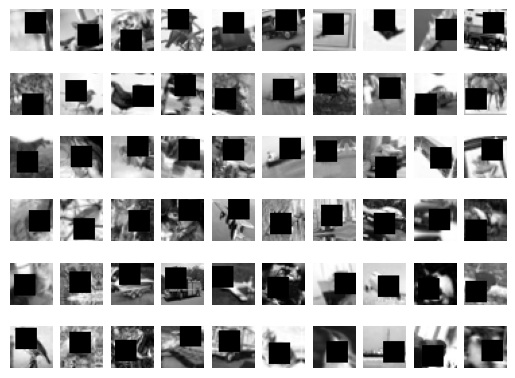

In [54]:
images, labels = next(iter(train_loader))
#print(images[0,1:].numpy().squeeze())


figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index][1:][1:].numpy().squeeze(),cmap="gray")

In [69]:
model = model.Net().to(device) #Call model.py to get the model
summary = utils.get_model_summary(model) #Get summary of the model that has been created
summary

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 34, 34]             432
              ReLU-2           [-1, 16, 34, 34]               0
       BatchNorm2d-3           [-1, 16, 34, 34]              32
           Dropout-4           [-1, 16, 34, 34]               0
            Conv2d-5           [-1, 32, 34, 34]           4,608
              ReLU-6           [-1, 32, 34, 34]               0
       BatchNorm2d-7           [-1, 32, 34, 34]              64
           Dropout-8           [-1, 32, 34, 34]               0
            Conv2d-9           [-1, 16, 18, 18]             512
           Conv2d-10           [-1, 32, 18, 18]           4,608
             ReLU-11           [-1, 32, 18, 18]               0
      BatchNorm2d-12           [-1, 32, 18, 18]              64
          Dropout-13           [-1, 32, 18, 18]               0
           Conv2d-14           [-1

In [71]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #For adjusting weights post error calculation
criterion = F.nll_loss
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True) #For updating learning rate of optimizer

In [72]:
epochs = 200
train_losses = []
test_losses = []
train_acc = []
test_acc = []

for epoch in range(1,epochs+1):
    print(f'Epoch {epoch}')
    train_accuracy, train_loss = utils.train(model, device, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)
    test_accuracy, test_loss = utils.test(model, device, test_loader, criterion)
    test_acc.append(test_accuracy)
    test_losses.append(test_loss)
    scheduler.step()


Epoch 1


Train: Loss=1.6296 Batch_id=390 Accuracy=30.95: 100%|██████████| 391/391 [00:15<00:00, 25.55it/s]


Test set: Average loss: 1.6423, Accuracy: 3983/10000 (39.83%)

Epoch 2


Train: Loss=1.7023 Batch_id=390 Accuracy=39.23: 100%|██████████| 391/391 [00:15<00:00, 25.33it/s]


Test set: Average loss: 1.4589, Accuracy: 4744/10000 (47.44%)

Epoch 3


Train: Loss=1.5458 Batch_id=390 Accuracy=42.61: 100%|██████████| 391/391 [00:16<00:00, 24.33it/s]


Test set: Average loss: 1.4308, Accuracy: 4880/10000 (48.80%)

Epoch 4


Train: Loss=1.5018 Batch_id=390 Accuracy=45.02: 100%|██████████| 391/391 [00:15<00:00, 25.76it/s]


Test set: Average loss: 1.3122, Accuracy: 5245/10000 (52.45%)

Epoch 5


Train: Loss=1.1670 Batch_id=390 Accuracy=47.38: 100%|██████████| 391/391 [00:15<00:00, 25.65it/s]


Test set: Average loss: 1.2786, Accuracy: 5410/10000 (54.10%)

Epoch 6


Train: Loss=1.1946 Batch_id=390 Accuracy=48.36: 100%|██████████| 391/391 [00:16<00:00, 23.70it/s]


Test set: Average loss: 1.2757, Accuracy: 5454/10000 (54.54%)

Epoch 7


Train: Loss=1.2065 Batch_id=390 Accuracy=49.75: 100%|██████████| 391/391 [00:15<00:00, 25.81it/s]


Test set: Average loss: 1.1741, Accuracy: 5808/10000 (58.08%)

Epoch 8


Train: Loss=1.3398 Batch_id=390 Accuracy=50.76: 100%|██████████| 391/391 [00:15<00:00, 25.86it/s]


Test set: Average loss: 1.1985, Accuracy: 5684/10000 (56.84%)

Epoch 9


Train: Loss=1.4148 Batch_id=390 Accuracy=51.76: 100%|██████████| 391/391 [00:15<00:00, 25.45it/s]


Test set: Average loss: 1.1050, Accuracy: 6055/10000 (60.55%)

Epoch 10


Train: Loss=1.5157 Batch_id=390 Accuracy=52.76: 100%|██████████| 391/391 [00:15<00:00, 25.84it/s]


Test set: Average loss: 1.1202, Accuracy: 6088/10000 (60.88%)

Epoch 11


Train: Loss=1.2809 Batch_id=390 Accuracy=53.08: 100%|██████████| 391/391 [00:15<00:00, 25.79it/s]


Test set: Average loss: 1.1397, Accuracy: 5930/10000 (59.30%)

Epoch 12


Train: Loss=1.2121 Batch_id=390 Accuracy=53.89: 100%|██████████| 391/391 [00:16<00:00, 23.85it/s]


Test set: Average loss: 1.0887, Accuracy: 6162/10000 (61.62%)

Epoch 13


Train: Loss=1.2665 Batch_id=390 Accuracy=54.37: 100%|██████████| 391/391 [00:15<00:00, 25.55it/s]


Test set: Average loss: 1.0957, Accuracy: 6154/10000 (61.54%)

Epoch 14


Train: Loss=1.2859 Batch_id=390 Accuracy=55.17: 100%|██████████| 391/391 [00:15<00:00, 25.55it/s]


Test set: Average loss: 1.0806, Accuracy: 6184/10000 (61.84%)

Epoch 15


Train: Loss=1.1671 Batch_id=390 Accuracy=55.20: 100%|██████████| 391/391 [00:15<00:00, 25.41it/s]


Test set: Average loss: 0.9935, Accuracy: 6479/10000 (64.79%)

Epoch 16


Train: Loss=1.2863 Batch_id=390 Accuracy=55.91: 100%|██████████| 391/391 [00:15<00:00, 25.92it/s]


Test set: Average loss: 0.9830, Accuracy: 6461/10000 (64.61%)

Epoch 17


Train: Loss=1.5555 Batch_id=390 Accuracy=56.45: 100%|██████████| 391/391 [00:16<00:00, 24.14it/s]


Test set: Average loss: 1.0805, Accuracy: 6255/10000 (62.55%)

Epoch 18


Train: Loss=1.2229 Batch_id=390 Accuracy=56.57: 100%|██████████| 391/391 [00:15<00:00, 25.96it/s]


Test set: Average loss: 0.9639, Accuracy: 6560/10000 (65.60%)

Epoch 19


Train: Loss=1.2545 Batch_id=390 Accuracy=56.74: 100%|██████████| 391/391 [00:15<00:00, 25.07it/s]


Test set: Average loss: 0.9792, Accuracy: 6529/10000 (65.29%)

Epoch 20


Train: Loss=1.2149 Batch_id=390 Accuracy=57.36: 100%|██████████| 391/391 [00:15<00:00, 25.93it/s]


Test set: Average loss: 0.9808, Accuracy: 6567/10000 (65.67%)

Epoch 21


Train: Loss=1.0279 Batch_id=390 Accuracy=58.34: 100%|██████████| 391/391 [00:15<00:00, 25.80it/s]


Test set: Average loss: 0.9593, Accuracy: 6589/10000 (65.89%)

Epoch 22


Train: Loss=1.2182 Batch_id=390 Accuracy=58.34: 100%|██████████| 391/391 [00:15<00:00, 25.09it/s]


Test set: Average loss: 0.9125, Accuracy: 6737/10000 (67.37%)

Epoch 23


Train: Loss=1.1289 Batch_id=390 Accuracy=58.76: 100%|██████████| 391/391 [00:15<00:00, 25.96it/s]


Test set: Average loss: 0.9538, Accuracy: 6640/10000 (66.40%)

Epoch 24


Train: Loss=1.0953 Batch_id=390 Accuracy=59.25: 100%|██████████| 391/391 [00:14<00:00, 26.09it/s]


Test set: Average loss: 0.8950, Accuracy: 6790/10000 (67.90%)

Epoch 25


Train: Loss=1.0315 Batch_id=390 Accuracy=59.18: 100%|██████████| 391/391 [00:14<00:00, 26.49it/s]


Test set: Average loss: 0.9332, Accuracy: 6663/10000 (66.63%)

Epoch 26


Train: Loss=1.1230 Batch_id=390 Accuracy=59.34: 100%|██████████| 391/391 [00:15<00:00, 24.96it/s]


Test set: Average loss: 0.9048, Accuracy: 6790/10000 (67.90%)

Epoch 27


Train: Loss=1.0438 Batch_id=390 Accuracy=59.37: 100%|██████████| 391/391 [00:14<00:00, 26.32it/s]


Test set: Average loss: 0.8836, Accuracy: 6832/10000 (68.32%)

Epoch 28


Train: Loss=1.1483 Batch_id=390 Accuracy=60.08: 100%|██████████| 391/391 [00:15<00:00, 25.94it/s]


Test set: Average loss: 0.8663, Accuracy: 6923/10000 (69.23%)

Epoch 29


Train: Loss=1.1094 Batch_id=390 Accuracy=60.22: 100%|██████████| 391/391 [00:16<00:00, 23.98it/s]


Test set: Average loss: 0.8571, Accuracy: 6907/10000 (69.07%)

Epoch 30


Train: Loss=0.9978 Batch_id=390 Accuracy=61.00: 100%|██████████| 391/391 [00:14<00:00, 26.18it/s]


Test set: Average loss: 0.8441, Accuracy: 6991/10000 (69.91%)

Epoch 31


Train: Loss=0.9809 Batch_id=390 Accuracy=60.86: 100%|██████████| 391/391 [00:15<00:00, 25.93it/s]


Test set: Average loss: 0.8779, Accuracy: 6960/10000 (69.60%)

Epoch 32


Train: Loss=0.9938 Batch_id=390 Accuracy=60.97: 100%|██████████| 391/391 [00:15<00:00, 25.71it/s]


Test set: Average loss: 0.8274, Accuracy: 7089/10000 (70.89%)

Epoch 33


Train: Loss=1.0077 Batch_id=390 Accuracy=61.57: 100%|██████████| 391/391 [00:16<00:00, 24.01it/s]


Test set: Average loss: 0.8468, Accuracy: 7003/10000 (70.03%)

Epoch 34


Train: Loss=0.9592 Batch_id=390 Accuracy=61.70: 100%|██████████| 391/391 [00:15<00:00, 25.92it/s]


Test set: Average loss: 0.8575, Accuracy: 7003/10000 (70.03%)

Epoch 35


Train: Loss=0.9958 Batch_id=390 Accuracy=61.99: 100%|██████████| 391/391 [00:14<00:00, 26.48it/s]


Test set: Average loss: 0.8592, Accuracy: 6948/10000 (69.48%)

Epoch 36


Train: Loss=1.2127 Batch_id=390 Accuracy=62.22: 100%|██████████| 391/391 [00:14<00:00, 26.24it/s]


Test set: Average loss: 0.8308, Accuracy: 7086/10000 (70.86%)

Epoch 37


Train: Loss=1.1350 Batch_id=390 Accuracy=62.36: 100%|██████████| 391/391 [00:15<00:00, 25.80it/s]


Test set: Average loss: 0.8064, Accuracy: 7119/10000 (71.19%)

Epoch 38


Train: Loss=0.9755 Batch_id=390 Accuracy=62.37: 100%|██████████| 391/391 [00:14<00:00, 26.31it/s]


Test set: Average loss: 0.7890, Accuracy: 7249/10000 (72.49%)

Epoch 39


Train: Loss=0.9772 Batch_id=390 Accuracy=62.77: 100%|██████████| 391/391 [00:14<00:00, 26.34it/s]


Test set: Average loss: 0.7636, Accuracy: 7287/10000 (72.87%)

Epoch 40


Train: Loss=1.1010 Batch_id=390 Accuracy=63.09: 100%|██████████| 391/391 [00:15<00:00, 26.01it/s]


Test set: Average loss: 0.7973, Accuracy: 7212/10000 (72.12%)

Epoch 41


Train: Loss=0.9368 Batch_id=390 Accuracy=63.14: 100%|██████████| 391/391 [00:15<00:00, 24.70it/s]


Test set: Average loss: 0.7680, Accuracy: 7337/10000 (73.37%)

Epoch 42


Train: Loss=1.0813 Batch_id=390 Accuracy=63.14: 100%|██████████| 391/391 [00:14<00:00, 26.36it/s]


Test set: Average loss: 0.7901, Accuracy: 7217/10000 (72.17%)

Epoch 43


Train: Loss=1.1283 Batch_id=390 Accuracy=63.36: 100%|██████████| 391/391 [00:15<00:00, 25.69it/s]


Test set: Average loss: 0.8090, Accuracy: 7207/10000 (72.07%)

Epoch 44


Train: Loss=0.8887 Batch_id=390 Accuracy=63.44: 100%|██████████| 391/391 [00:16<00:00, 23.60it/s]


Test set: Average loss: 0.7468, Accuracy: 7388/10000 (73.88%)

Epoch 45


Train: Loss=1.1085 Batch_id=390 Accuracy=63.86: 100%|██████████| 391/391 [00:15<00:00, 24.93it/s]


Test set: Average loss: 0.7419, Accuracy: 7406/10000 (74.06%)

Epoch 46


Train: Loss=0.7589 Batch_id=390 Accuracy=63.71: 100%|██████████| 391/391 [00:15<00:00, 26.05it/s]


Test set: Average loss: 0.7385, Accuracy: 7408/10000 (74.08%)

Epoch 47


Train: Loss=0.9926 Batch_id=390 Accuracy=63.76: 100%|██████████| 391/391 [00:15<00:00, 25.20it/s]


Test set: Average loss: 0.7313, Accuracy: 7421/10000 (74.21%)

Epoch 48


Train: Loss=0.9002 Batch_id=390 Accuracy=64.01: 100%|██████████| 391/391 [00:15<00:00, 24.68it/s]


Test set: Average loss: 0.7584, Accuracy: 7378/10000 (73.78%)

Epoch 49


Train: Loss=0.9042 Batch_id=390 Accuracy=64.24: 100%|██████████| 391/391 [00:15<00:00, 24.52it/s]


Test set: Average loss: 0.7167, Accuracy: 7538/10000 (75.38%)

Epoch 50


Train: Loss=0.9099 Batch_id=390 Accuracy=64.10: 100%|██████████| 391/391 [00:15<00:00, 25.51it/s]


Test set: Average loss: 0.7406, Accuracy: 7379/10000 (73.79%)

Epoch 51


Train: Loss=0.9673 Batch_id=390 Accuracy=64.60: 100%|██████████| 391/391 [00:14<00:00, 26.16it/s]


Test set: Average loss: 0.7078, Accuracy: 7545/10000 (75.45%)

Epoch 52


Train: Loss=0.9972 Batch_id=390 Accuracy=64.82: 100%|██████████| 391/391 [00:15<00:00, 24.46it/s]


Test set: Average loss: 0.7293, Accuracy: 7496/10000 (74.96%)

Epoch 53


Train: Loss=1.0283 Batch_id=390 Accuracy=64.73: 100%|██████████| 391/391 [00:14<00:00, 26.15it/s]


Test set: Average loss: 0.7446, Accuracy: 7442/10000 (74.42%)

Epoch 54


Train: Loss=0.8738 Batch_id=390 Accuracy=64.71: 100%|██████████| 391/391 [00:15<00:00, 24.80it/s]


Test set: Average loss: 0.7511, Accuracy: 7363/10000 (73.63%)

Epoch 55


Train: Loss=0.9866 Batch_id=390 Accuracy=64.82: 100%|██████████| 391/391 [00:15<00:00, 25.37it/s]


Test set: Average loss: 0.7160, Accuracy: 7522/10000 (75.22%)

Epoch 56


Train: Loss=0.9155 Batch_id=390 Accuracy=65.23: 100%|██████████| 391/391 [00:15<00:00, 25.57it/s]


Test set: Average loss: 0.7042, Accuracy: 7564/10000 (75.64%)

Epoch 57


Train: Loss=1.0117 Batch_id=390 Accuracy=65.16: 100%|██████████| 391/391 [00:16<00:00, 24.05it/s]


Test set: Average loss: 0.6954, Accuracy: 7589/10000 (75.89%)

Epoch 58


Train: Loss=0.9454 Batch_id=390 Accuracy=65.40: 100%|██████████| 391/391 [00:15<00:00, 25.53it/s]


Test set: Average loss: 0.6851, Accuracy: 7605/10000 (76.05%)

Epoch 59


Train: Loss=1.2507 Batch_id=390 Accuracy=65.35: 100%|██████████| 391/391 [00:15<00:00, 25.50it/s]


Test set: Average loss: 0.7366, Accuracy: 7478/10000 (74.78%)

Epoch 60


Train: Loss=1.1113 Batch_id=390 Accuracy=65.78: 100%|██████████| 391/391 [00:15<00:00, 25.92it/s]


Test set: Average loss: 0.7249, Accuracy: 7471/10000 (74.71%)

Epoch 61


Train: Loss=0.9760 Batch_id=390 Accuracy=65.54: 100%|██████████| 391/391 [00:15<00:00, 25.99it/s]


Test set: Average loss: 0.6948, Accuracy: 7621/10000 (76.21%)

Epoch 62


Train: Loss=0.8877 Batch_id=390 Accuracy=65.68: 100%|██████████| 391/391 [00:14<00:00, 26.26it/s]


Test set: Average loss: 0.7034, Accuracy: 7570/10000 (75.70%)

Epoch 63


Train: Loss=0.8020 Batch_id=390 Accuracy=65.74: 100%|██████████| 391/391 [00:15<00:00, 24.51it/s]


Test set: Average loss: 0.7337, Accuracy: 7494/10000 (74.94%)

Epoch 64


Train: Loss=0.9203 Batch_id=390 Accuracy=65.98: 100%|██████████| 391/391 [00:15<00:00, 24.60it/s]


Test set: Average loss: 0.7270, Accuracy: 7536/10000 (75.36%)

Epoch 65


Train: Loss=0.9398 Batch_id=390 Accuracy=66.12: 100%|██████████| 391/391 [00:14<00:00, 26.18it/s]


Test set: Average loss: 0.6991, Accuracy: 7606/10000 (76.06%)

Epoch 66


Train: Loss=1.1296 Batch_id=390 Accuracy=65.88: 100%|██████████| 391/391 [00:15<00:00, 25.90it/s]


Test set: Average loss: 0.6994, Accuracy: 7604/10000 (76.04%)

Epoch 67


Train: Loss=1.0140 Batch_id=390 Accuracy=65.95: 100%|██████████| 391/391 [00:15<00:00, 26.00it/s]


Test set: Average loss: 0.6823, Accuracy: 7626/10000 (76.26%)

Epoch 68


Train: Loss=0.9558 Batch_id=390 Accuracy=66.08: 100%|██████████| 391/391 [00:15<00:00, 25.90it/s]


Test set: Average loss: 0.6843, Accuracy: 7632/10000 (76.32%)

Epoch 69


Train: Loss=0.8158 Batch_id=390 Accuracy=66.34: 100%|██████████| 391/391 [00:14<00:00, 26.15it/s]


Test set: Average loss: 0.6555, Accuracy: 7705/10000 (77.05%)

Epoch 70


Train: Loss=0.8553 Batch_id=390 Accuracy=66.49: 100%|██████████| 391/391 [00:15<00:00, 25.29it/s]


Test set: Average loss: 0.6787, Accuracy: 7657/10000 (76.57%)

Epoch 71


Train: Loss=0.7328 Batch_id=390 Accuracy=66.60: 100%|██████████| 391/391 [00:16<00:00, 24.12it/s]


Test set: Average loss: 0.6732, Accuracy: 7681/10000 (76.81%)

Epoch 72


Train: Loss=1.0593 Batch_id=390 Accuracy=66.54: 100%|██████████| 391/391 [00:15<00:00, 25.18it/s]


Test set: Average loss: 0.7167, Accuracy: 7473/10000 (74.73%)

Epoch 73


Train: Loss=1.0311 Batch_id=390 Accuracy=66.68: 100%|██████████| 391/391 [00:15<00:00, 25.66it/s]


Test set: Average loss: 0.6944, Accuracy: 7653/10000 (76.53%)

Epoch 74


Train: Loss=0.8895 Batch_id=390 Accuracy=67.13: 100%|██████████| 391/391 [00:16<00:00, 23.85it/s]


Test set: Average loss: 0.6626, Accuracy: 7693/10000 (76.93%)

Epoch 75


Train: Loss=1.1240 Batch_id=390 Accuracy=66.67: 100%|██████████| 391/391 [00:16<00:00, 23.31it/s]


Test set: Average loss: 0.6624, Accuracy: 7721/10000 (77.21%)

Epoch 76


Train: Loss=1.1871 Batch_id=390 Accuracy=66.76: 100%|██████████| 391/391 [00:15<00:00, 25.18it/s]


Test set: Average loss: 0.6723, Accuracy: 7702/10000 (77.02%)

Epoch 77


Train: Loss=0.8837 Batch_id=390 Accuracy=66.68: 100%|██████████| 391/391 [00:16<00:00, 24.10it/s]


Test set: Average loss: 0.6398, Accuracy: 7777/10000 (77.77%)

Epoch 78


Train: Loss=0.8128 Batch_id=390 Accuracy=67.21: 100%|██████████| 391/391 [00:15<00:00, 25.32it/s]


Test set: Average loss: 0.6409, Accuracy: 7792/10000 (77.92%)

Epoch 79


Train: Loss=1.0979 Batch_id=390 Accuracy=67.04: 100%|██████████| 391/391 [00:15<00:00, 25.16it/s]


Test set: Average loss: 0.6594, Accuracy: 7774/10000 (77.74%)

Epoch 80


Train: Loss=0.8505 Batch_id=390 Accuracy=66.99: 100%|██████████| 391/391 [00:16<00:00, 23.78it/s]


Test set: Average loss: 0.6541, Accuracy: 7756/10000 (77.56%)

Epoch 81


Train: Loss=0.7923 Batch_id=390 Accuracy=67.36: 100%|██████████| 391/391 [00:15<00:00, 25.26it/s]


Test set: Average loss: 0.6705, Accuracy: 7695/10000 (76.95%)

Epoch 82


Train: Loss=0.7858 Batch_id=390 Accuracy=67.00: 100%|██████████| 391/391 [00:15<00:00, 25.38it/s]


Test set: Average loss: 0.6414, Accuracy: 7731/10000 (77.31%)

Epoch 83


Train: Loss=0.9122 Batch_id=390 Accuracy=67.65: 100%|██████████| 391/391 [00:15<00:00, 24.55it/s]


Test set: Average loss: 0.6957, Accuracy: 7588/10000 (75.88%)

Epoch 84


Train: Loss=0.7820 Batch_id=390 Accuracy=67.56: 100%|██████████| 391/391 [00:15<00:00, 25.50it/s]


Test set: Average loss: 0.6584, Accuracy: 7765/10000 (77.65%)

Epoch 85


Train: Loss=0.9685 Batch_id=390 Accuracy=67.51: 100%|██████████| 391/391 [00:15<00:00, 25.38it/s]


Test set: Average loss: 0.6514, Accuracy: 7784/10000 (77.84%)

Epoch 86


Train: Loss=0.7790 Batch_id=390 Accuracy=67.62: 100%|██████████| 391/391 [00:16<00:00, 23.29it/s]


Test set: Average loss: 0.6445, Accuracy: 7754/10000 (77.54%)

Epoch 87


Train: Loss=1.0294 Batch_id=390 Accuracy=67.68: 100%|██████████| 391/391 [00:15<00:00, 25.37it/s]


Test set: Average loss: 0.6501, Accuracy: 7764/10000 (77.64%)

Epoch 88


Train: Loss=0.9222 Batch_id=390 Accuracy=67.62: 100%|██████████| 391/391 [00:15<00:00, 25.34it/s]


Test set: Average loss: 0.6553, Accuracy: 7772/10000 (77.72%)

Epoch 89


Train: Loss=0.8708 Batch_id=390 Accuracy=68.03: 100%|██████████| 391/391 [00:15<00:00, 25.21it/s]


Test set: Average loss: 0.6361, Accuracy: 7810/10000 (78.10%)

Epoch 90


Train: Loss=1.1266 Batch_id=390 Accuracy=67.74: 100%|██████████| 391/391 [00:15<00:00, 25.44it/s]


Test set: Average loss: 0.6351, Accuracy: 7834/10000 (78.34%)

Epoch 91


Train: Loss=0.9728 Batch_id=390 Accuracy=67.72: 100%|██████████| 391/391 [00:15<00:00, 25.41it/s]


Test set: Average loss: 0.6111, Accuracy: 7945/10000 (79.45%)

Epoch 92


Train: Loss=0.9535 Batch_id=390 Accuracy=67.69: 100%|██████████| 391/391 [00:15<00:00, 26.04it/s]


Test set: Average loss: 0.6426, Accuracy: 7801/10000 (78.01%)

Epoch 93


Train: Loss=1.0554 Batch_id=390 Accuracy=67.96: 100%|██████████| 391/391 [00:15<00:00, 25.51it/s]


Test set: Average loss: 0.6469, Accuracy: 7806/10000 (78.06%)

Epoch 94


Train: Loss=0.8458 Batch_id=390 Accuracy=67.76: 100%|██████████| 391/391 [00:15<00:00, 26.03it/s]


Test set: Average loss: 0.6394, Accuracy: 7815/10000 (78.15%)

Epoch 95


Train: Loss=0.8259 Batch_id=390 Accuracy=67.83: 100%|██████████| 391/391 [00:15<00:00, 25.74it/s]


Test set: Average loss: 0.6359, Accuracy: 7812/10000 (78.12%)

Epoch 96


Train: Loss=0.9153 Batch_id=390 Accuracy=68.09: 100%|██████████| 391/391 [00:15<00:00, 25.05it/s]


Test set: Average loss: 0.6434, Accuracy: 7845/10000 (78.45%)

Epoch 97


Train: Loss=0.8228 Batch_id=390 Accuracy=67.93: 100%|██████████| 391/391 [00:16<00:00, 24.26it/s]


Test set: Average loss: 0.6397, Accuracy: 7819/10000 (78.19%)

Epoch 98


Train: Loss=0.9224 Batch_id=390 Accuracy=67.96: 100%|██████████| 391/391 [00:15<00:00, 26.03it/s]


Test set: Average loss: 0.6277, Accuracy: 7877/10000 (78.77%)

Epoch 99


Train: Loss=0.6970 Batch_id=390 Accuracy=68.15: 100%|██████████| 391/391 [00:15<00:00, 25.24it/s]


Test set: Average loss: 0.6195, Accuracy: 7893/10000 (78.93%)

Epoch 100


Train: Loss=0.8632 Batch_id=390 Accuracy=68.42: 100%|██████████| 391/391 [00:15<00:00, 25.84it/s]


Test set: Average loss: 0.6201, Accuracy: 7855/10000 (78.55%)

Epoch 101


Train: Loss=1.0619 Batch_id=390 Accuracy=68.08: 100%|██████████| 391/391 [00:15<00:00, 25.95it/s]


Test set: Average loss: 0.6449, Accuracy: 7801/10000 (78.01%)

Epoch 102


Train: Loss=1.0402 Batch_id=390 Accuracy=68.24: 100%|██████████| 391/391 [00:15<00:00, 25.79it/s]


Test set: Average loss: 0.6296, Accuracy: 7815/10000 (78.15%)

Epoch 103


Train: Loss=1.0350 Batch_id=390 Accuracy=68.61: 100%|██████████| 391/391 [00:15<00:00, 24.84it/s]


Test set: Average loss: 0.6185, Accuracy: 7850/10000 (78.50%)

Epoch 104


Train: Loss=0.7239 Batch_id=390 Accuracy=68.45: 100%|██████████| 391/391 [00:15<00:00, 25.64it/s]


Test set: Average loss: 0.6507, Accuracy: 7767/10000 (77.67%)

Epoch 105


Train: Loss=0.7777 Batch_id=390 Accuracy=68.36: 100%|██████████| 391/391 [00:15<00:00, 25.93it/s]


Test set: Average loss: 0.6230, Accuracy: 7857/10000 (78.57%)

Epoch 106


Train: Loss=0.9566 Batch_id=390 Accuracy=68.57: 100%|██████████| 391/391 [00:16<00:00, 24.32it/s]


Test set: Average loss: 0.6371, Accuracy: 7864/10000 (78.64%)

Epoch 107


Train: Loss=0.8980 Batch_id=390 Accuracy=68.57: 100%|██████████| 391/391 [00:15<00:00, 25.23it/s]


Test set: Average loss: 0.6296, Accuracy: 7839/10000 (78.39%)

Epoch 108


Train: Loss=0.9695 Batch_id=390 Accuracy=68.43: 100%|██████████| 391/391 [00:16<00:00, 23.87it/s]


Test set: Average loss: 0.6115, Accuracy: 7914/10000 (79.14%)

Epoch 109


Train: Loss=1.0661 Batch_id=390 Accuracy=68.45: 100%|██████████| 391/391 [00:16<00:00, 24.34it/s]


Test set: Average loss: 0.6320, Accuracy: 7863/10000 (78.63%)

Epoch 110


Train: Loss=1.1239 Batch_id=390 Accuracy=68.58: 100%|██████████| 391/391 [00:15<00:00, 25.73it/s]


Test set: Average loss: 0.6254, Accuracy: 7897/10000 (78.97%)

Epoch 111


Train: Loss=0.8679 Batch_id=390 Accuracy=68.59: 100%|██████████| 391/391 [00:15<00:00, 24.97it/s]


Test set: Average loss: 0.6258, Accuracy: 7863/10000 (78.63%)

Epoch 112


Train: Loss=0.6640 Batch_id=390 Accuracy=68.92: 100%|██████████| 391/391 [00:16<00:00, 23.63it/s]


Test set: Average loss: 0.6092, Accuracy: 7916/10000 (79.16%)

Epoch 113


Train: Loss=0.9649 Batch_id=390 Accuracy=69.17: 100%|██████████| 391/391 [00:16<00:00, 24.41it/s]


Test set: Average loss: 0.6391, Accuracy: 7832/10000 (78.32%)

Epoch 114


Train: Loss=0.8986 Batch_id=390 Accuracy=68.74: 100%|██████████| 391/391 [00:15<00:00, 24.74it/s]


Test set: Average loss: 0.6415, Accuracy: 7855/10000 (78.55%)

Epoch 115


Train: Loss=0.8894 Batch_id=390 Accuracy=68.99: 100%|██████████| 391/391 [00:16<00:00, 23.91it/s]


Test set: Average loss: 0.6089, Accuracy: 7930/10000 (79.30%)

Epoch 116


Train: Loss=0.8907 Batch_id=390 Accuracy=69.15: 100%|██████████| 391/391 [00:15<00:00, 25.56it/s]


Test set: Average loss: 0.6188, Accuracy: 7900/10000 (79.00%)

Epoch 117


Train: Loss=1.0538 Batch_id=390 Accuracy=68.74: 100%|██████████| 391/391 [00:15<00:00, 25.65it/s]


Test set: Average loss: 0.6292, Accuracy: 7874/10000 (78.74%)

Epoch 118


Train: Loss=0.9875 Batch_id=390 Accuracy=69.27: 100%|██████████| 391/391 [00:15<00:00, 24.98it/s]


Test set: Average loss: 0.6037, Accuracy: 7967/10000 (79.67%)

Epoch 119


Train: Loss=0.8556 Batch_id=390 Accuracy=69.09: 100%|██████████| 391/391 [00:15<00:00, 24.97it/s]


Test set: Average loss: 0.5884, Accuracy: 7976/10000 (79.76%)

Epoch 120


Train: Loss=0.8963 Batch_id=390 Accuracy=69.30: 100%|██████████| 391/391 [00:15<00:00, 25.77it/s]


Test set: Average loss: 0.6350, Accuracy: 7871/10000 (78.71%)

Epoch 121


Train: Loss=0.7083 Batch_id=390 Accuracy=69.32: 100%|██████████| 391/391 [00:15<00:00, 25.60it/s]


Test set: Average loss: 0.6029, Accuracy: 7944/10000 (79.44%)

Epoch 122


Train: Loss=0.8241 Batch_id=390 Accuracy=69.27: 100%|██████████| 391/391 [00:15<00:00, 25.85it/s]


Test set: Average loss: 0.5923, Accuracy: 7951/10000 (79.51%)

Epoch 123


Train: Loss=1.0357 Batch_id=390 Accuracy=69.31: 100%|██████████| 391/391 [00:15<00:00, 25.92it/s]


Test set: Average loss: 0.6126, Accuracy: 7874/10000 (78.74%)

Epoch 124


Train: Loss=0.6938 Batch_id=390 Accuracy=69.13: 100%|██████████| 391/391 [00:15<00:00, 25.64it/s]


Test set: Average loss: 0.5986, Accuracy: 7934/10000 (79.34%)

Epoch 125


Train: Loss=0.9890 Batch_id=390 Accuracy=69.01: 100%|██████████| 391/391 [00:15<00:00, 24.98it/s]


Test set: Average loss: 0.6099, Accuracy: 7925/10000 (79.25%)

Epoch 126


Train: Loss=0.7660 Batch_id=390 Accuracy=69.46: 100%|██████████| 391/391 [00:15<00:00, 25.50it/s]


Test set: Average loss: 0.6250, Accuracy: 7889/10000 (78.89%)

Epoch 127


Train: Loss=0.7155 Batch_id=390 Accuracy=69.50: 100%|██████████| 391/391 [00:15<00:00, 25.59it/s]


Test set: Average loss: 0.5846, Accuracy: 8016/10000 (80.16%)

Epoch 128


Train: Loss=0.9910 Batch_id=390 Accuracy=69.28: 100%|██████████| 391/391 [00:16<00:00, 24.41it/s]


Test set: Average loss: 0.5951, Accuracy: 7987/10000 (79.87%)

Epoch 129


Train: Loss=1.0174 Batch_id=390 Accuracy=69.36: 100%|██████████| 391/391 [00:15<00:00, 25.61it/s]


Test set: Average loss: 0.5976, Accuracy: 7980/10000 (79.80%)

Epoch 130


Train: Loss=0.9223 Batch_id=390 Accuracy=69.63: 100%|██████████| 391/391 [00:15<00:00, 25.85it/s]


Test set: Average loss: 0.6148, Accuracy: 7911/10000 (79.11%)

Epoch 131


Train: Loss=0.8656 Batch_id=390 Accuracy=69.59: 100%|██████████| 391/391 [00:16<00:00, 23.68it/s]


Test set: Average loss: 0.6312, Accuracy: 7858/10000 (78.58%)

Epoch 132


Train: Loss=1.0362 Batch_id=390 Accuracy=69.66: 100%|██████████| 391/391 [00:15<00:00, 25.72it/s]


Test set: Average loss: 0.5910, Accuracy: 8003/10000 (80.03%)

Epoch 133


Train: Loss=0.7977 Batch_id=390 Accuracy=69.34: 100%|██████████| 391/391 [00:15<00:00, 25.67it/s]


Test set: Average loss: 0.5755, Accuracy: 8026/10000 (80.26%)

Epoch 134


Train: Loss=1.0036 Batch_id=390 Accuracy=69.45: 100%|██████████| 391/391 [00:15<00:00, 25.73it/s]


Test set: Average loss: 0.5888, Accuracy: 7980/10000 (79.80%)

Epoch 135


Train: Loss=0.8852 Batch_id=390 Accuracy=69.47: 100%|██████████| 391/391 [00:15<00:00, 25.34it/s]


Test set: Average loss: 0.5948, Accuracy: 7953/10000 (79.53%)

Epoch 136


Train: Loss=0.9272 Batch_id=390 Accuracy=69.65: 100%|██████████| 391/391 [00:15<00:00, 25.92it/s]


Test set: Average loss: 0.6107, Accuracy: 7934/10000 (79.34%)

Epoch 137


Train: Loss=0.8667 Batch_id=390 Accuracy=69.98: 100%|██████████| 391/391 [00:15<00:00, 25.67it/s]


Test set: Average loss: 0.5837, Accuracy: 8009/10000 (80.09%)

Epoch 138


Train: Loss=0.9264 Batch_id=390 Accuracy=69.54: 100%|██████████| 391/391 [00:15<00:00, 24.69it/s]


Test set: Average loss: 0.5853, Accuracy: 8015/10000 (80.15%)

Epoch 139


Train: Loss=0.6851 Batch_id=390 Accuracy=69.70: 100%|██████████| 391/391 [00:15<00:00, 25.63it/s]


Test set: Average loss: 0.5911, Accuracy: 7978/10000 (79.78%)

Epoch 140


Train: Loss=0.8923 Batch_id=390 Accuracy=69.90: 100%|██████████| 391/391 [00:15<00:00, 25.69it/s]


Test set: Average loss: 0.6144, Accuracy: 7955/10000 (79.55%)

Epoch 141


Train: Loss=0.7822 Batch_id=390 Accuracy=69.65: 100%|██████████| 391/391 [00:15<00:00, 24.57it/s]


Test set: Average loss: 0.5930, Accuracy: 7988/10000 (79.88%)

Epoch 142


Train: Loss=0.8403 Batch_id=390 Accuracy=69.93: 100%|██████████| 391/391 [00:16<00:00, 23.85it/s]


Test set: Average loss: 0.5756, Accuracy: 8021/10000 (80.21%)

Epoch 143


Train: Loss=0.8218 Batch_id=390 Accuracy=70.07: 100%|██████████| 391/391 [00:15<00:00, 25.69it/s]


Test set: Average loss: 0.5877, Accuracy: 8004/10000 (80.04%)

Epoch 144


Train: Loss=0.8653 Batch_id=390 Accuracy=70.18: 100%|██████████| 391/391 [00:15<00:00, 25.26it/s]


Test set: Average loss: 0.5865, Accuracy: 7980/10000 (79.80%)

Epoch 145


Train: Loss=0.8147 Batch_id=390 Accuracy=69.90: 100%|██████████| 391/391 [00:15<00:00, 25.03it/s]


Test set: Average loss: 0.6061, Accuracy: 7940/10000 (79.40%)

Epoch 146


Train: Loss=1.1059 Batch_id=390 Accuracy=69.80: 100%|██████████| 391/391 [00:15<00:00, 25.19it/s]


Test set: Average loss: 0.5798, Accuracy: 8028/10000 (80.28%)

Epoch 147


Train: Loss=0.6573 Batch_id=390 Accuracy=69.92: 100%|██████████| 391/391 [00:15<00:00, 25.37it/s]


Test set: Average loss: 0.5617, Accuracy: 8089/10000 (80.89%)

Epoch 148


Train: Loss=0.6892 Batch_id=390 Accuracy=70.05: 100%|██████████| 391/391 [00:15<00:00, 24.83it/s]


Test set: Average loss: 0.5811, Accuracy: 8020/10000 (80.20%)

Epoch 149


Train: Loss=0.7431 Batch_id=390 Accuracy=70.22: 100%|██████████| 391/391 [00:15<00:00, 24.83it/s]


Test set: Average loss: 0.5842, Accuracy: 8013/10000 (80.13%)

Epoch 150


Train: Loss=0.8733 Batch_id=390 Accuracy=70.24: 100%|██████████| 391/391 [00:15<00:00, 25.48it/s]


Test set: Average loss: 0.5890, Accuracy: 8015/10000 (80.15%)

Epoch 151


Train: Loss=0.9690 Batch_id=390 Accuracy=69.92: 100%|██████████| 391/391 [00:16<00:00, 23.60it/s]


Test set: Average loss: 0.5825, Accuracy: 8042/10000 (80.42%)

Epoch 152


Train: Loss=0.7109 Batch_id=390 Accuracy=70.05: 100%|██████████| 391/391 [00:15<00:00, 25.32it/s]


Test set: Average loss: 0.5772, Accuracy: 8052/10000 (80.52%)

Epoch 153


Train: Loss=0.9668 Batch_id=390 Accuracy=70.14: 100%|██████████| 391/391 [00:16<00:00, 23.80it/s]


Test set: Average loss: 0.5947, Accuracy: 7998/10000 (79.98%)

Epoch 154


Train: Loss=0.7606 Batch_id=390 Accuracy=70.54: 100%|██████████| 391/391 [00:16<00:00, 23.97it/s]


Test set: Average loss: 0.5763, Accuracy: 8070/10000 (80.70%)

Epoch 155


Train: Loss=0.8221 Batch_id=390 Accuracy=70.32: 100%|██████████| 391/391 [00:15<00:00, 25.01it/s]


Test set: Average loss: 0.5936, Accuracy: 8026/10000 (80.26%)

Epoch 156


Train: Loss=0.6690 Batch_id=390 Accuracy=70.50: 100%|██████████| 391/391 [00:15<00:00, 25.12it/s]


Test set: Average loss: 0.5755, Accuracy: 8062/10000 (80.62%)

Epoch 157


Train: Loss=0.6613 Batch_id=390 Accuracy=70.44: 100%|██████████| 391/391 [00:16<00:00, 24.00it/s]


Test set: Average loss: 0.5648, Accuracy: 8112/10000 (81.12%)

Epoch 158


Train: Loss=0.8051 Batch_id=390 Accuracy=70.41: 100%|██████████| 391/391 [00:15<00:00, 25.29it/s]


Test set: Average loss: 0.5658, Accuracy: 8107/10000 (81.07%)

Epoch 159


Train: Loss=0.6964 Batch_id=390 Accuracy=70.43: 100%|██████████| 391/391 [00:15<00:00, 25.39it/s]


Test set: Average loss: 0.5887, Accuracy: 7998/10000 (79.98%)

Epoch 160


Train: Loss=0.9356 Batch_id=390 Accuracy=70.37: 100%|██████████| 391/391 [00:16<00:00, 23.77it/s]


Test set: Average loss: 0.5717, Accuracy: 8102/10000 (81.02%)

Epoch 161


Train: Loss=0.7062 Batch_id=390 Accuracy=70.19: 100%|██████████| 391/391 [00:15<00:00, 25.09it/s]


Test set: Average loss: 0.5716, Accuracy: 8057/10000 (80.57%)

Epoch 162


Train: Loss=0.8763 Batch_id=390 Accuracy=70.71: 100%|██████████| 391/391 [00:15<00:00, 25.35it/s]


Test set: Average loss: 0.5794, Accuracy: 8081/10000 (80.81%)

Epoch 163


Train: Loss=0.6770 Batch_id=390 Accuracy=70.70: 100%|██████████| 391/391 [00:15<00:00, 24.71it/s]


Test set: Average loss: 0.5584, Accuracy: 8099/10000 (80.99%)

Epoch 164


Train: Loss=0.7493 Batch_id=390 Accuracy=70.87: 100%|██████████| 391/391 [00:16<00:00, 23.49it/s]


Test set: Average loss: 0.5662, Accuracy: 8088/10000 (80.88%)

Epoch 165


Train: Loss=0.9246 Batch_id=390 Accuracy=70.69: 100%|██████████| 391/391 [00:15<00:00, 24.72it/s]


Test set: Average loss: 0.5833, Accuracy: 8023/10000 (80.23%)

Epoch 166


Train: Loss=0.7705 Batch_id=390 Accuracy=70.42: 100%|██████████| 391/391 [00:15<00:00, 25.54it/s]


Test set: Average loss: 0.5663, Accuracy: 8087/10000 (80.87%)

Epoch 167


Train: Loss=1.0048 Batch_id=390 Accuracy=70.44: 100%|██████████| 391/391 [00:15<00:00, 24.70it/s]


Test set: Average loss: 0.5667, Accuracy: 8075/10000 (80.75%)

Epoch 168


Train: Loss=0.7215 Batch_id=390 Accuracy=70.40: 100%|██████████| 391/391 [00:16<00:00, 24.22it/s]


Test set: Average loss: 0.5631, Accuracy: 8127/10000 (81.27%)

Epoch 169


Train: Loss=0.8166 Batch_id=390 Accuracy=70.55: 100%|██████████| 391/391 [00:16<00:00, 23.35it/s]


Test set: Average loss: 0.5847, Accuracy: 8032/10000 (80.32%)

Epoch 170


Train: Loss=0.8805 Batch_id=390 Accuracy=70.85: 100%|██████████| 391/391 [00:16<00:00, 24.18it/s]


Test set: Average loss: 0.5614, Accuracy: 8106/10000 (81.06%)

Epoch 171


Train: Loss=0.8721 Batch_id=390 Accuracy=70.82: 100%|██████████| 391/391 [00:16<00:00, 24.32it/s]


Test set: Average loss: 0.5695, Accuracy: 8069/10000 (80.69%)

Epoch 172


Train: Loss=0.6904 Batch_id=390 Accuracy=70.58: 100%|██████████| 391/391 [00:17<00:00, 22.36it/s]


Test set: Average loss: 0.5793, Accuracy: 8049/10000 (80.49%)

Epoch 173


Train: Loss=0.7569 Batch_id=390 Accuracy=70.89: 100%|██████████| 391/391 [00:16<00:00, 24.39it/s]


Test set: Average loss: 0.5692, Accuracy: 8129/10000 (81.29%)

Epoch 174


Train: Loss=0.7354 Batch_id=390 Accuracy=70.71: 100%|██████████| 391/391 [00:15<00:00, 25.19it/s]


Test set: Average loss: 0.5727, Accuracy: 8066/10000 (80.66%)

Epoch 175


Train: Loss=0.6321 Batch_id=390 Accuracy=70.62: 100%|██████████| 391/391 [00:17<00:00, 22.97it/s]


Test set: Average loss: 0.5632, Accuracy: 8092/10000 (80.92%)

Epoch 176


Train: Loss=0.8656 Batch_id=390 Accuracy=71.06: 100%|██████████| 391/391 [00:15<00:00, 24.98it/s]


Test set: Average loss: 0.5635, Accuracy: 8113/10000 (81.13%)

Epoch 177


Train: Loss=0.8319 Batch_id=390 Accuracy=71.00: 100%|██████████| 391/391 [00:15<00:00, 24.58it/s]


Test set: Average loss: 0.5693, Accuracy: 8089/10000 (80.89%)

Epoch 178


Train: Loss=0.6453 Batch_id=390 Accuracy=70.76: 100%|██████████| 391/391 [00:15<00:00, 25.46it/s]


Test set: Average loss: 0.5591, Accuracy: 8097/10000 (80.97%)

Epoch 179


Train: Loss=0.8495 Batch_id=390 Accuracy=70.68: 100%|██████████| 391/391 [00:15<00:00, 25.21it/s]


Test set: Average loss: 0.5639, Accuracy: 8103/10000 (81.03%)

Epoch 180


Train: Loss=0.8888 Batch_id=390 Accuracy=70.76: 100%|██████████| 391/391 [00:15<00:00, 25.23it/s]


Test set: Average loss: 0.5648, Accuracy: 8120/10000 (81.20%)

Epoch 181


Train: Loss=0.7111 Batch_id=390 Accuracy=71.00: 100%|██████████| 391/391 [00:15<00:00, 25.19it/s]


Test set: Average loss: 0.5593, Accuracy: 8129/10000 (81.29%)

Epoch 182


Train: Loss=0.6855 Batch_id=390 Accuracy=70.70: 100%|██████████| 391/391 [00:15<00:00, 25.35it/s]


Test set: Average loss: 0.5527, Accuracy: 8132/10000 (81.32%)

Epoch 183


Train: Loss=0.7704 Batch_id=390 Accuracy=71.19: 100%|██████████| 391/391 [00:15<00:00, 25.11it/s]


Test set: Average loss: 0.5521, Accuracy: 8163/10000 (81.63%)

Epoch 184


Train: Loss=0.9354 Batch_id=390 Accuracy=70.80: 100%|██████████| 391/391 [00:15<00:00, 24.62it/s]


Test set: Average loss: 0.5478, Accuracy: 8147/10000 (81.47%)

Epoch 185


Train: Loss=0.7144 Batch_id=390 Accuracy=71.09: 100%|██████████| 391/391 [00:15<00:00, 24.70it/s]


Test set: Average loss: 0.5719, Accuracy: 8078/10000 (80.78%)

Epoch 186


Train: Loss=0.8596 Batch_id=390 Accuracy=70.94: 100%|██████████| 391/391 [00:16<00:00, 23.40it/s]


Test set: Average loss: 0.5484, Accuracy: 8162/10000 (81.62%)

Epoch 187


Train: Loss=1.0257 Batch_id=390 Accuracy=70.96: 100%|██████████| 391/391 [00:15<00:00, 24.89it/s]


Test set: Average loss: 0.5591, Accuracy: 8122/10000 (81.22%)

Epoch 188


Train: Loss=0.7341 Batch_id=390 Accuracy=71.21: 100%|██████████| 391/391 [00:15<00:00, 24.54it/s]


Test set: Average loss: 0.5960, Accuracy: 8003/10000 (80.03%)

Epoch 189


Train: Loss=0.8400 Batch_id=390 Accuracy=70.87: 100%|██████████| 391/391 [00:16<00:00, 24.18it/s]


Test set: Average loss: 0.5502, Accuracy: 8137/10000 (81.37%)

Epoch 190


Train: Loss=0.7721 Batch_id=390 Accuracy=71.34: 100%|██████████| 391/391 [00:15<00:00, 24.56it/s]


Test set: Average loss: 0.5547, Accuracy: 8132/10000 (81.32%)

Epoch 191


Train: Loss=0.7119 Batch_id=390 Accuracy=71.20: 100%|██████████| 391/391 [00:15<00:00, 24.61it/s]


Test set: Average loss: 0.5592, Accuracy: 8158/10000 (81.58%)

Epoch 192


Train: Loss=0.9094 Batch_id=390 Accuracy=71.04: 100%|██████████| 391/391 [00:17<00:00, 22.96it/s]


Test set: Average loss: 0.5622, Accuracy: 8098/10000 (80.98%)

Epoch 193


Train: Loss=0.9235 Batch_id=390 Accuracy=70.81: 100%|██████████| 391/391 [00:15<00:00, 24.65it/s]


Test set: Average loss: 0.5511, Accuracy: 8140/10000 (81.40%)

Epoch 194


Train: Loss=0.7580 Batch_id=390 Accuracy=70.85: 100%|██████████| 391/391 [00:15<00:00, 24.72it/s]


Test set: Average loss: 0.5532, Accuracy: 8136/10000 (81.36%)

Epoch 195


Train: Loss=1.0222 Batch_id=390 Accuracy=71.30: 100%|██████████| 391/391 [00:16<00:00, 23.56it/s]


Test set: Average loss: 0.5642, Accuracy: 8098/10000 (80.98%)

Epoch 196


Train: Loss=0.7851 Batch_id=390 Accuracy=71.51: 100%|██████████| 391/391 [00:15<00:00, 24.89it/s]


Test set: Average loss: 0.5533, Accuracy: 8143/10000 (81.43%)

Epoch 197


Train: Loss=0.8026 Batch_id=390 Accuracy=71.42: 100%|██████████| 391/391 [00:16<00:00, 24.01it/s]


Test set: Average loss: 0.5393, Accuracy: 8179/10000 (81.79%)

Epoch 198


Train: Loss=0.7533 Batch_id=390 Accuracy=71.13: 100%|██████████| 391/391 [00:15<00:00, 24.50it/s]


Test set: Average loss: 0.5431, Accuracy: 8158/10000 (81.58%)

Epoch 199


Train: Loss=1.0268 Batch_id=390 Accuracy=71.34: 100%|██████████| 391/391 [00:15<00:00, 25.00it/s]


Test set: Average loss: 0.5393, Accuracy: 8159/10000 (81.59%)

Epoch 200


Train: Loss=1.0639 Batch_id=390 Accuracy=71.38: 100%|██████████| 391/391 [00:15<00:00, 25.79it/s]


Test set: Average loss: 0.5554, Accuracy: 8132/10000 (81.32%)



In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")